In [1]:
import cv2,os
import argparse
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [2]:
data_path="../input/facemaskdetection/data/data"
data_path1="../input/face-mask-12k-images-dataset/Face Mask Dataset/Train"
data_path2="../input/face-mask-12k-images-dataset/Face Mask Dataset/Test"
categories=os.listdir(data_path1)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

img_size=100
data=[]
target=[]

{'WithoutMask': 0, 'WithMask': 1}
['WithoutMask', 'WithMask']
[0, 1]


In [3]:
def load_data(data_path):
    for category in categories:
        folder_path=os.path.join(data_path,category)
        img_names=os.listdir(folder_path)

        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
                resized=cv2.resize(gray,(img_size,img_size))

                data.append(resized)
                target.append(label_dict[category])

            except Exception as e:
                print('Exception:',e)

In [4]:
load_data(data_path)
load_data(data_path1)
load_data(data_path2)

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))

target=np.array(target)
new_target=np_utils.to_categorical(target) 

In [6]:
np.save('data',data)
np.save('target',new_target)

# Convolutional Neural Network Architecture

In [7]:
data=np.load('./data.npy')
target=np.load('./target.npy')

In [8]:
def define_model():
    model=Sequential()

    model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128,(3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,(3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [9]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
model=define_model()

In [10]:
checkpoint = ModelCheckpoint('FaceClassifier.hdf5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
279/279 [==============================] - 15s 39ms/step - loss: 0.3211 - accuracy: 0.8823 - val_loss: 0.5775 - val_accuracy: 0.7818
Epoch 2/20
279/279 [==============================] - 10s 36ms/step - loss: 0.1764 - accuracy: 0.9582 - val_loss: 0.1817 - val_accuracy: 0.9502
Epoch 3/20
279/279 [==============================] - 10s 36ms/step - loss: 0.1354 - accuracy: 0.9673 - val_loss: 0.1299 - val_accuracy: 0.9632
Epoch 4/20
279/279 [==============================] - 10s 35ms/step - loss: 0.1021 - accuracy: 0.9768 - val_loss: 0.1227 - val_accuracy: 0.9735
Epoch 5/20
279/279 [==============================] - 10s 36ms/step - loss: 0.0863 - accuracy: 0.9807 - val_loss: 0.0772 - val_accuracy: 0.9811
Epoch 6/20
279/279 [==============================] - 10s 36ms/step - loss: 0.0751 - accuracy: 0.9836 - val_loss: 0.0739 - val_accuracy: 0.9762
Epoch 7/20
279/279 [==============================] - 10s 36ms/step - loss: 0.0611 - accuracy: 0.9873 - val_loss: 0.0577 - val_accuracy:

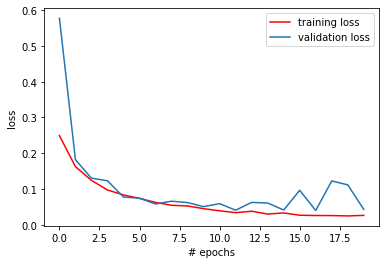

In [11]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

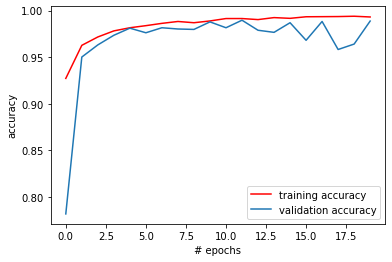

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

39/39 [==============================] - 1s 14ms/step - loss: 0.0438 - accuracy: 0.9863
[0.043844785541296005, 0.9862570762634277]


#### Accuracy : 0.9903 